### Time Series Analysis on AMZN, FB, IBM, MMM Stock Data from 2012/07/31 to 2017/06/30

In this notebook downloaded stock data from July 31st 2012 to June 30th 2017 is analyzed. __Time Series analysis__ has been used and data has been resampled to get the prices for the end of the business month. Then adjusted close for each stock is selected. 

The autocorrelation between the adjusted month-end close prices for each of the stocks are then looked at. In addition, monthly returns for each stock is calculated. At last, the 4 series presenting the monthly returns ( stock data from AMZN, IBM, FB, and MMM monthly return) are combined into a dataframe and is then being analyzed for any possible correlations between them.

In [1]:

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

amzn = pd.read_csv('amzn_2012-7-31_2017-6-30.csv')
fb = pd.read_csv('fb_2012-7-31_2017-6-30.csv')
ibm = pd.read_csv('ibm_2012-7-31_2017-6-30.csv')
mmm= pd.read_csv('mmm_2012-7-31_2017-6-30.csv')

amzn['datetime']=pd.to_datetime(amzn['Date'])
fb['datetime'] = pd.to_datetime(fb['Date'])
ibm['datetime'] = pd.to_datetime(ibm['Date'])
mmm['datetime'] = pd.to_datetime(mmm['Date'])



In [2]:
amzn.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,datetime
0,2017-06-30,980.12,983.47,967.61,968.00,3309138.0,0.0,1.0,980.12,983.47,967.61,968.00,3309138.0,2017-06-30
1,2017-06-29,979.00,987.56,965.25,975.93,4246765.0,0.0,1.0,979.00,987.56,965.25,975.93,4246765.0,2017-06-29
2,2017-06-28,978.55,990.68,969.21,990.33,3708638.0,0.0,1.0,978.55,990.68,969.21,990.33,3708638.0,2017-06-28
3,2017-06-27,990.69,998.80,976.00,976.78,3735360.0,0.0,1.0,990.69,998.80,976.00,976.78,3735360.0,2017-06-27
4,2017-06-26,1008.50,1009.80,992.00,993.98,3347195.0,0.0,1.0,1008.50,1009.80,992.00,993.98,3347195.0,2017-06-26


After saving the stock data into dataframes, the datetime column is added and set as the index. Then the adjusted closed is saved into a Pandas series. 

In [3]:
amzn=amzn.set_index('datetime')
fb=fb.set_index('datetime')
ibm=ibm.set_index('datetime')
mmm=mmm.set_index('datetime')

In [4]:
amzn.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
datetime,,,,,,,,,,,,,
2017-06-30,2017-06-30,980.12,983.47,967.61,968.00,3309138.0,0.0,1.0,980.12,983.47,967.61,968.00,3309138.0
2017-06-29,2017-06-29,979.00,987.56,965.25,975.93,4246765.0,0.0,1.0,979.00,987.56,965.25,975.93,4246765.0
2017-06-28,2017-06-28,978.55,990.68,969.21,990.33,3708638.0,0.0,1.0,978.55,990.68,969.21,990.33,3708638.0
2017-06-27,2017-06-27,990.69,998.80,976.00,976.78,3735360.0,0.0,1.0,990.69,998.80,976.00,976.78,3735360.0
2017-06-26,2017-06-26,1008.50,1009.80,992.00,993.98,3347195.0,0.0,1.0,1008.50,1009.80,992.00,993.98,3347195.0


In [5]:
amzn_2 = pd.Series(amzn['AdjClose'])
fb_2 = pd.Series(fb['AdjClose'])
ibm_2 = pd.Series(ibm['AdjClose'])
mmm_2 = pd.Series(mmm['AdjClose'])

In [6]:
amzn_2.head()

datetime
2017-06-30    968.00
2017-06-29    975.93
2017-06-28    990.33
2017-06-27    976.78
2017-06-26    993.98
Name: AdjClose, dtype: float64

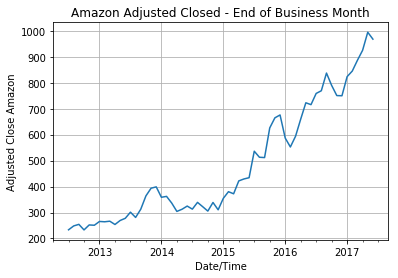

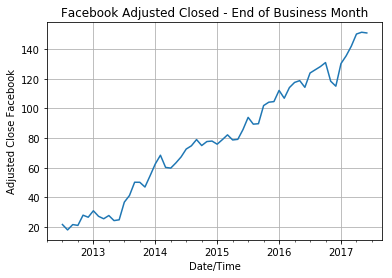

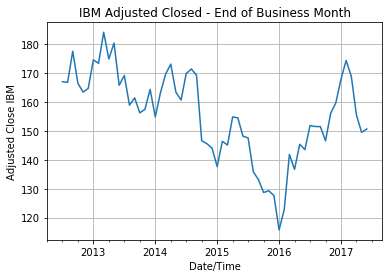

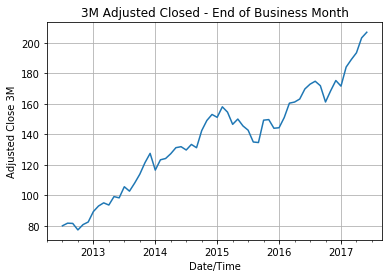

In [7]:
# Reversing the datetime
amzn_R=amzn_2[::-1]
fb_R=fb_2[::-1]
ibm_R=ibm_2[::-1]
mmm_R=mmm_2[::-1]

#Removing NaN in the Business Month frequency
amzn_BM= amzn_R.asfreq(freq='BM', method='pad')
fb_BM = fb_R.asfreq(freq='BM', method='pad')
ibm_BM= ibm_R.asfreq(freq='BM', method='pad')
mmm_BM = mmm_R.asfreq(freq='BM', method='pad')

amzn_plot=amzn_BM.plot(style='-', title='Amazon Adjusted Closed - End of Business Month')
amzn_plot.grid()
amzn_plot.set_ylabel("Adjusted Close Amazon")
amzn_plot.set_xlabel("Date/Time")
plt.show()

fb_plot=fb_BM.plot(style='-', title='Facebook Adjusted Closed - End of Business Month')
fb_plot.grid()
fb_plot.set_ylabel("Adjusted Close Facebook")
fb_plot.set_xlabel("Date/Time")
plt.show()

ibm_plot=ibm_BM.plot(style='-', title='IBM Adjusted Closed - End of Business Month')
ibm_plot.grid()
ibm_plot.set_ylabel("Adjusted Close IBM")
ibm_plot.set_xlabel("Date/Time")
plt.show()

mmm_plot=mmm_BM.plot(style='-', title='3M Adjusted Closed - End of Business Month')
mmm_plot.grid()
mmm_plot.set_ylabel("Adjusted Close 3M")
mmm_plot.set_xlabel("Date/Time")
plt.show()

The autocorrelation between the stock data is then plotted. The data from Amazon, Facebook, IBM, and 3M are showing autocorrelation as the spikes are non-zero for most of data. The value is not zero and therefore data fluctuation is not because of white noise.

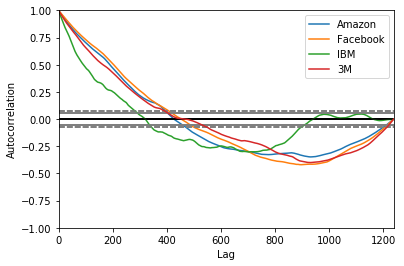

In [8]:

auto_amzn = pd.plotting.autocorrelation_plot(amzn_R.dropna(), label='Amazon')

auto_fb = pd.plotting.autocorrelation_plot(fb_R.dropna(), label='Facebook')

auto_ibm = pd.plotting.autocorrelation_plot(ibm_R.dropna(), label='IBM')

auto_mmm = pd.plotting.autocorrelation_plot(mmm_R.dropna(), label='3M')


Shifting the adjusted close by one would show the adjusted opening of each business month. The difference between the adjusted close and monthly adjusted open (which is technically the adjusted close of the previous month) would show the monthly return.

From the plots we can see that the autocorrelation for the monthly return is less than the adjusted closing. The higher the lag is getting the less autocoreelated data gets and more whitenoise is considered for data fluctuations. Amazon has lower autocorrelation towards the far right of the plot (end of date time range and higher lag)

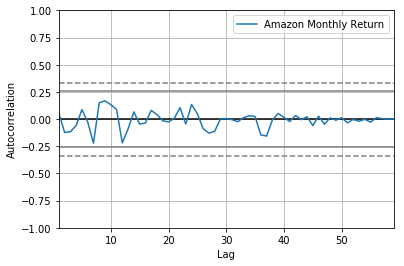

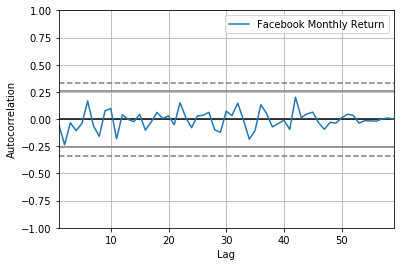

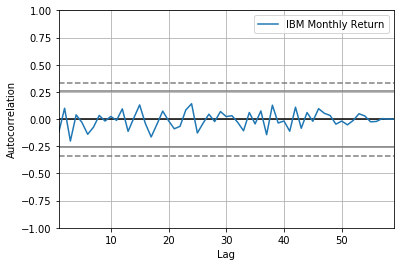

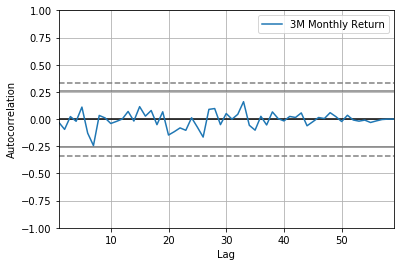

In [9]:

amzn_shifted=amzn_BM.shift(1) 
amzn_monthly = amzn_BM-amzn_shifted

fb_monthly= fb_BM - fb_BM.shift(1)
ibm_monthly = ibm_BM - ibm_BM.shift(1)
mmm_monthly = mmm_BM - mmm_BM.shift(1)
auto_amzn_return = pd.plotting.autocorrelation_plot(amzn_monthly.dropna(), label='Amazon Monthly Return')
plt.show()
auto_fb_return = pd.plotting.autocorrelation_plot(fb_monthly.dropna(), label='Facebook Monthly Return')
plt.show()
auto_ibm_return = pd.plotting.autocorrelation_plot(ibm_monthly.dropna(), label='IBM Monthly Return')
plt.show()
auto_mmm_return = pd.plotting.autocorrelation_plot(mmm_monthly.dropna(), label='3M Monthly Return')
plt.show()

The monthly returns are then combined into a dataframe and plotted to study their correlation. 

               AMZN     FB        IBM       MMM
datetime                                       
2012-07-31      NaN    NaN        NaN       NaN
2012-08-31  14.9700 -3.652  -0.253978  1.720804
2012-09-28   6.0500  3.602  10.789921 -0.159080
2012-10-31 -21.4269 -0.550 -11.063951 -4.259819
2012-11-30  19.1569  6.890  -3.095549  3.493398


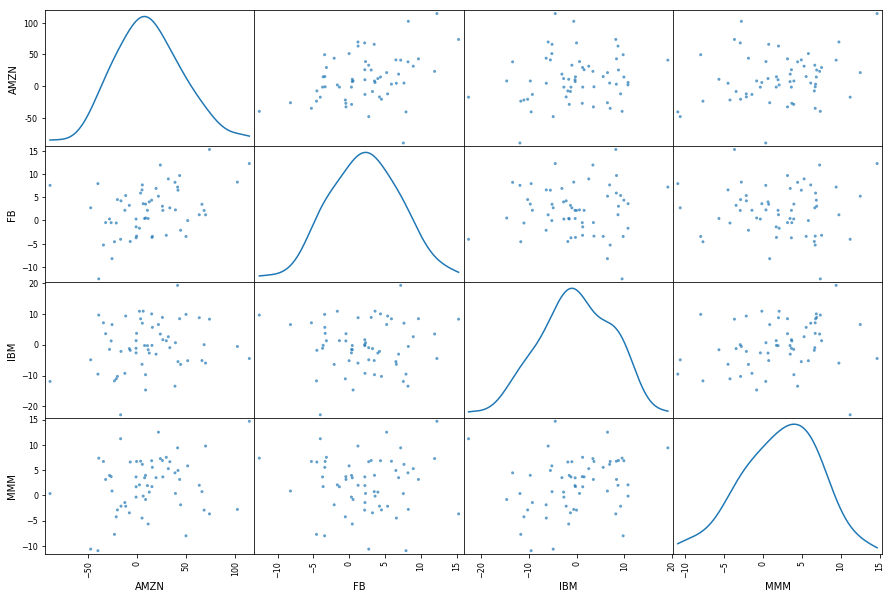

In [10]:
df= pd.DataFrame(amzn_monthly)
df['FB'] = pd.DataFrame(fb_monthly)
df['IBM'] = pd.DataFrame(ibm_monthly)
df['MMM'] = pd.DataFrame(mmm_monthly)
df=df.rename(columns = {'AdjClose':'AMZN'})
print(df.head())
scatter_plot = pd.plotting.scatter_matrix(df, alpha=0.7,  figsize=(15, 10), diagonal='kde')
plt.show()
print(' ')

From the plots it could be concluded that there is no correlation between the monthly returns between IBM, FB, and MMM. 
While AMZN monthly return does not have any correlation with IBM and MMM, it could have a very slight correlation with FB's monthly return.